# 02. Nueral Network classification with Pytorch


In [68]:
## 1. Make classification data and get it ready

import sklearn
from sklearn.datasets import make_circles

In [69]:
n_samples = 1000
#Make circles
X, y  = make_circles(n_samples, noise=0.03, random_state=42)

In [70]:
len(X), len(y)

(1000, 1000)

In [71]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [72]:
#make DataFrame of circle data

import pandas as pd
circles = pd.DataFrame({"x1": X[:,0], "X2": X[:, 1], "label":y})
circles.head(10)

,x1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


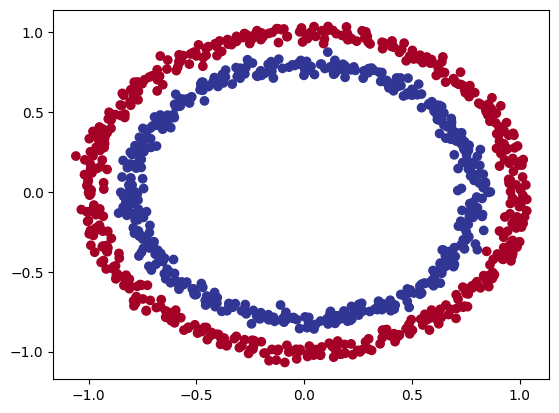

In [73]:
#visucalize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note: The data we are working on is often called toy data, it is small but also big enough to practise the models

# 1.1 Check input and output shapes

In [74]:
X.shape, y.shape

((1000, 2), (1000,))

In [75]:
# view the first example of features and labesl
X_sample = X[0]
y_sample = y[0]
X_sample, y_sample

(array([0.75424625, 0.23148074]), 1)

### 1.2 Turn data into tensors and create train andtest

In [76]:
import torch
torch.__version__

'2.5.1+cu124'

In [77]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
type(X), type(y)

(torch.Tensor, torch.Tensor)

### split data into train and test

In [78]:
import sklearn
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

1. set up device agnostic code
2. Construct a model (by sub classing 'nn.Module)
3. define loss and optimizer
4. Create a training and test loop

In [81]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [82]:
X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]], device='cuda:0'),
 tensor([[-3.7519e-01,  6.8266e-01],
         [ 1.5380e-02,  9.6003e-01],
         [-7.0278e-01, -3.1472e-01],
         [-2.8525e-01,  9.6638e-01],
         [ 4.0242e-01, -7.4375e-01],
         [ 6.3228e-01, -5.7111e-01],
         [ 8.5607e-01,  5.4994e-01],
         [ 1.0034e+00,  1.9028e-01],
         [-7.4892e-01, -2.9511e-01],
         [ 5.3780e-02,  9.7388e-01],
         [-4.7020e-01,  7.8749e-01],
         [-2.1686e-01,  7.2418e-01],
         [ 9.7026e-01,  3.6688e-01],
         [-5.8446e-01, -5.7415e-01],
         [-9.1147e-01, -2.4631e-01],
         [ 7.6892e-01, -7.3249e-02],
         [ 3.8408e-01,  6.8299e-01],
         [-6.8364e-01,  7.1417e-01],
         [-5.7777e-01,  5.3652e-01],
         [-8.3274e-01,  4.6625e-01],
         [ 1.2448e-02,  9.8709e-01],
         [ 1.009

In [83]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layes
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        
    def forward(self, x):
        return self.layer_2(self.layer_1(x))
        

In [84]:
#make a object of class
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [85]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [86]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [87]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3046, -0.1140],
                      [ 0.4056, -0.0128],
                      [-0.6792, -0.5825],
                      [ 0.6053,  0.3037],
                      [-0.6114,  0.0424]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.0941,  0.5954, -0.3639,  0.1532,  0.0271], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0660,  0.0553, -0.2610, -0.4225, -0.0614]], device='cuda:0')),
             ('1.bias', tensor([0.0204], device='cuda:0'))])

In [90]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
len(untrained_preds), untrained_preds.shape, X_test.shape

(200, torch.Size([200, 1]), torch.Size([200, 2]))

### 2.1 Setup loss fn and optimizer

Which loss fn or optimizer to use - it is problem specific

for example for regression you might want to use MAE or MSE
for classification use cross entropy

And for optimizer - two common are sgd and adam but also has other ways

In [91]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [92]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3046, -0.1140],
                      [ 0.4056, -0.0128],
                      [-0.6792, -0.5825],
                      [ 0.6053,  0.3037],
                      [-0.6114,  0.0424]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.0941,  0.5954, -0.3639,  0.1532,  0.0271], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0660,  0.0553, -0.2610, -0.4225, -0.0614]], device='cuda:0')),
             ('1.bias', tensor([0.0204], device='cuda:0'))])

In [93]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum()
    acc = (correct/ len(y_pred)) * 100
    return acc

# 3. Train Model

In [95]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))
y_logits

tensor([[0.1092],
        [0.1018],
        [0.0940],
        [0.1136],
        [0.0394],
        [0.0353],
        [0.0579],
        [0.0422],
        [0.0964],
        [0.1007],
        [0.1158],
        [0.1042],
        [0.0484],
        [0.0822],
        [0.1040],
        [0.0439],
        [0.0799],
        [0.1220],
        [0.1129],
        [0.1208],
        [0.1027],
        [0.0305],
        [0.1134],
        [0.1255],
        [0.0718],
        [0.0513],
        [0.0578],
        [0.0279],
        [0.1073],
        [0.0742],
        [0.0652],
        [0.0755],
        [0.1151],
        [0.0502],
        [0.1187],
        [0.0928],
        [0.1089],
        [0.0860],
        [0.0565],
        [0.0784],
        [0.1144],
        [0.1027],
        [0.0786],
        [0.0348],
        [0.1168],
        [0.0903],
        [0.0326],
        [0.1047],
        [0.0943],
        [0.0370],
        [0.1141],
        [0.1172],
        [0.0302],
        [0.0385],
        [0.0548],
        [0

In [96]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [97]:
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.5273],
        [0.5254],
        [0.5235],
        [0.5284],
        [0.5098],
        [0.5088],
        [0.5145],
        [0.5105],
        [0.5241],
        [0.5252],
        [0.5289],
        [0.5260],
        [0.5121],
        [0.5205],
        [0.5260],
        [0.5110],
        [0.5200],
        [0.5305],
        [0.5282],
        [0.5302],
        [0.5256],
        [0.5076],
        [0.5283],
        [0.5313],
        [0.5180],
        [0.5128],
        [0.5145],
        [0.5070],
        [0.5268],
        [0.5185],
        [0.5163],
        [0.5189],
        [0.5287],
        [0.5125],
        [0.5296],
        [0.5232],
        [0.5272],
        [0.5215],
        [0.5141],
        [0.5196],
        [0.5286],
        [0.5257],
        [0.5196],
        [0.5087],
        [0.5292],
        [0.5226],
        [0.5082],
        [0.5262],
        [0.5236],
        [0.5093],
        [0.5285],
        [0.5293],
        [0.5075],
        [0.5096],
        [0.5137],
        [0

In [99]:
y_preds = torch.round(y_preds_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()



tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.], device='cuda:0')

## 3.2 Building a training and testing loop

In [103]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_0.train()
    
    #forward pass
    y_logits = model_0(X_train.to(device)).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    
    #calculate the loss
    loss = loss_fn(y_logits,
                   y_train)
    accuracy = accuracy_fn(y_true= y_train,
                           y_pred = y_preds)
    
    #optimizer zero grad
    optimizer.zero_grad()
    
    #loss backward
    loss.backward()
    
    #optimizer step
    optimizer.step()
    
    ## Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test.to(device)).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                            y_pred=test_pred)
        
    if epoch % 10 == 0:
        print(f"Epoch- {epoch} | loss: {loss:.5f}, accuracy: {accuracy:.2f} | Test loss: {test_loss:.5f}, test accuracy: {test_acc:.2f} ")
    
    
    

Epoch- 0 | loss: 0.69298, accuracy: 51.25 | Test loss: 0.69461, test accuracy: 46.50 
Epoch- 10 | loss: 0.69298, accuracy: 51.12 | Test loss: 0.69462, test accuracy: 46.00 
Epoch- 20 | loss: 0.69298, accuracy: 51.12 | Test loss: 0.69463, test accuracy: 46.00 
Epoch- 30 | loss: 0.69298, accuracy: 51.38 | Test loss: 0.69464, test accuracy: 45.50 
Epoch- 40 | loss: 0.69298, accuracy: 51.38 | Test loss: 0.69465, test accuracy: 45.00 
Epoch- 50 | loss: 0.69298, accuracy: 51.50 | Test loss: 0.69465, test accuracy: 45.00 
Epoch- 60 | loss: 0.69298, accuracy: 51.50 | Test loss: 0.69466, test accuracy: 45.00 
Epoch- 70 | loss: 0.69298, accuracy: 51.62 | Test loss: 0.69466, test accuracy: 45.50 
Epoch- 80 | loss: 0.69298, accuracy: 51.50 | Test loss: 0.69467, test accuracy: 45.50 
Epoch- 90 | loss: 0.69298, accuracy: 51.50 | Test loss: 0.69467, test accuracy: 45.00 


## 4. Make predictions and evaluate the model

looks like the model is not learning


In [104]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("already exists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
        

In [106]:
from helper_functions import plot_predictions, plot_decision_boundary

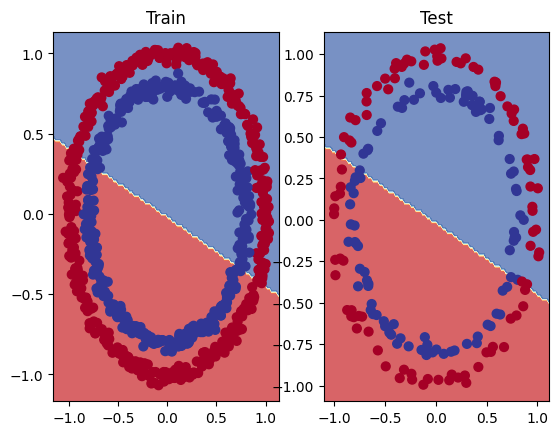

In [107]:
plt.Figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# 5. Imporve a model (from a model perspective)

1. add more layers
2. increase hidden units
3. bigger epochs
4. change activation func
5. change loss func
6. change learning rate

In [109]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
    

        

In [110]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [111]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [117]:
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
    model_1.train()
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, y_train)
    accuracy = accuracy_fn(y_train, y_pred)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step
    
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)
        
    if epoch % 10 == 0:
        print(f"Epoch- {epoch} | loss: {loss:.5f}, accuracy: {accuracy:.2f} | Test loss: {test_loss:.5f}, test accuracy: {test_acc:.2f} ")
    

Epoch- 0 | loss: 0.69396, accuracy: 50.87 | Test loss: 0.69261, test accuracy: 51.00 
Epoch- 10 | loss: 0.69396, accuracy: 50.87 | Test loss: 0.69261, test accuracy: 51.00 
Epoch- 20 | loss: 0.69396, accuracy: 50.87 | Test loss: 0.69261, test accuracy: 51.00 
Epoch- 30 | loss: 0.69396, accuracy: 50.87 | Test loss: 0.69261, test accuracy: 51.00 
Epoch- 40 | loss: 0.69396, accuracy: 50.87 | Test loss: 0.69261, test accuracy: 51.00 
Epoch- 50 | loss: 0.69396, accuracy: 50.87 | Test loss: 0.69261, test accuracy: 51.00 
Epoch- 60 | loss: 0.69396, accuracy: 50.87 | Test loss: 0.69261, test accuracy: 51.00 
Epoch- 70 | loss: 0.69396, accuracy: 50.87 | Test loss: 0.69261, test accuracy: 51.00 
Epoch- 80 | loss: 0.69396, accuracy: 50.87 | Test loss: 0.69261, test accuracy: 51.00 
Epoch- 90 | loss: 0.69396, accuracy: 50.87 | Test loss: 0.69261, test accuracy: 51.00 
Epoch- 100 | loss: 0.69396, accuracy: 50.87 | Test loss: 0.69261, test accuracy: 51.00 
Epoch- 110 | loss: 0.69396, accuracy: 50.87

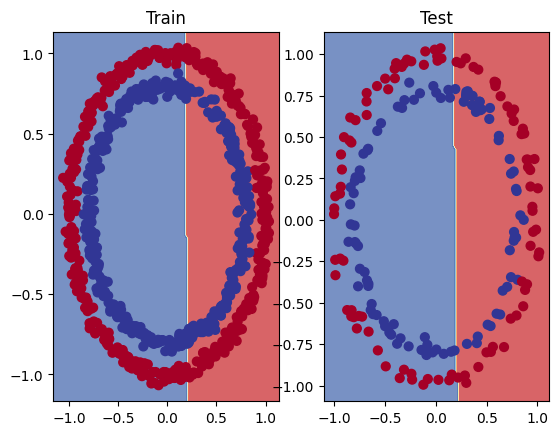

In [118]:
plt.Figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [129]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=128)
        self.layer_2 = nn.Linear(in_features=128, out_features=128)
        self.layer_3 = nn.Linear(in_features=128, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))
    

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)

In [130]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [131]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_3.train()
    y_logits = model_3(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, y_train)
    accuracy = accuracy_fn(y_train, y_preds)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)
        
    if epoch % 100 == 0:
        print(f"Epoch- {epoch} | loss: {loss:.5f}, accuracy: {accuracy:.2f} | Test loss: {test_loss:.5f}, test accuracy: {test_acc:.2f} ")
    

Epoch- 0 | loss: 0.69277, accuracy: 50.00 | Test loss: 0.69311, test accuracy: 50.00 
Epoch- 100 | loss: 0.69277, accuracy: 50.00 | Test loss: 0.69311, test accuracy: 50.00 
Epoch- 200 | loss: 0.69277, accuracy: 50.00 | Test loss: 0.69311, test accuracy: 50.00 
Epoch- 300 | loss: 0.69277, accuracy: 50.00 | Test loss: 0.69311, test accuracy: 50.00 
Epoch- 400 | loss: 0.69277, accuracy: 50.00 | Test loss: 0.69311, test accuracy: 50.00 
Epoch- 500 | loss: 0.69277, accuracy: 50.00 | Test loss: 0.69311, test accuracy: 50.00 
Epoch- 600 | loss: 0.69277, accuracy: 50.00 | Test loss: 0.69311, test accuracy: 50.00 
Epoch- 700 | loss: 0.69277, accuracy: 50.00 | Test loss: 0.69311, test accuracy: 50.00 
Epoch- 800 | loss: 0.69277, accuracy: 50.00 | Test loss: 0.69311, test accuracy: 50.00 
Epoch- 900 | loss: 0.69277, accuracy: 50.00 | Test loss: 0.69311, test accuracy: 50.00 


##Putting it all together - multiclass

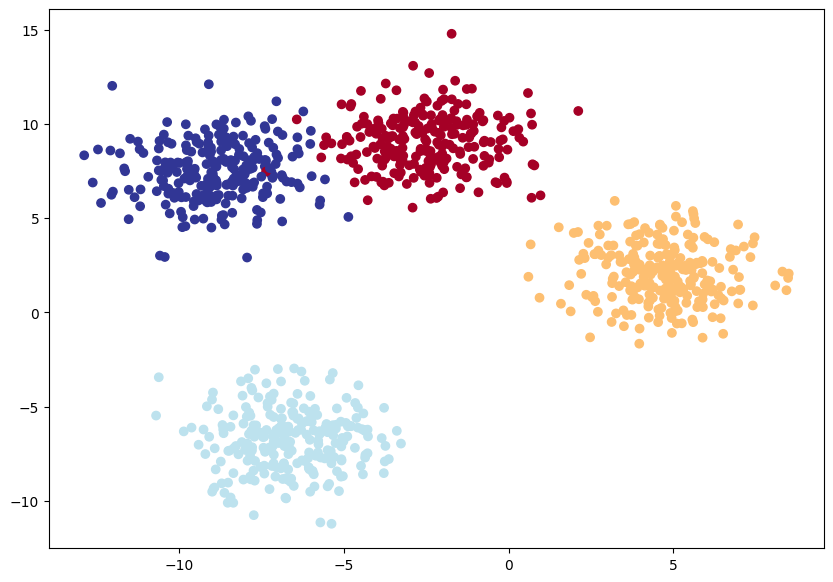

In [162]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#datasets
NUM_CLASSES =4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5  ,
                            random_state=RANDOM_SEED)

#2. turn data into tensors
X_blob = torch.from_numpy(X_blob). type(torch.float)
y_blob = torch.from_numpy(y_blob). type(torch.LongTensor)

#3. split data
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

#4. plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);

In [163]:
## Building a multiclass classification model in pytorch

In [164]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [165]:
# model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )
        
    def forward(self, x):
        return self.linear_layer_stack(x)
    


In [166]:
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [167]:
#loss fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)


In [168]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [169]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    model_4.train()
    
    y_logits = model_4(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    loss = loss_fn(y_logits, y_train)
    accuracy = accuracy_fn(y_train, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)
        
    if epoch % 10 == 0:
        print(f"Epoch- {epoch} | loss: {loss:.5f}, accuracy: {accuracy:.2f} | Test loss: {test_loss:.5f}, test accuracy: {test_acc:.2f} ")
    
        

Epoch- 0 | loss: 1.15883, accuracy: 40.38 | Test loss: 1.07554, test accuracy: 48.00 
Epoch- 10 | loss: 0.64476, accuracy: 96.75 | Test loss: 0.66069, test accuracy: 97.50 
Epoch- 20 | loss: 0.42535, accuracy: 98.50 | Test loss: 0.43074, test accuracy: 100.00 
Epoch- 30 | loss: 0.25294, accuracy: 99.12 | Test loss: 0.24508, test accuracy: 99.50 
Epoch- 40 | loss: 0.11232, accuracy: 99.25 | Test loss: 0.10229, test accuracy: 99.50 
Epoch- 50 | loss: 0.06627, accuracy: 99.25 | Test loss: 0.05848, test accuracy: 99.50 
Epoch- 60 | loss: 0.05068, accuracy: 99.25 | Test loss: 0.04293, test accuracy: 99.50 
Epoch- 70 | loss: 0.04300, accuracy: 99.25 | Test loss: 0.03491, test accuracy: 99.50 
Epoch- 80 | loss: 0.03836, accuracy: 99.25 | Test loss: 0.02988, test accuracy: 99.50 
Epoch- 90 | loss: 0.03525, accuracy: 99.25 | Test loss: 0.02663, test accuracy: 99.50 


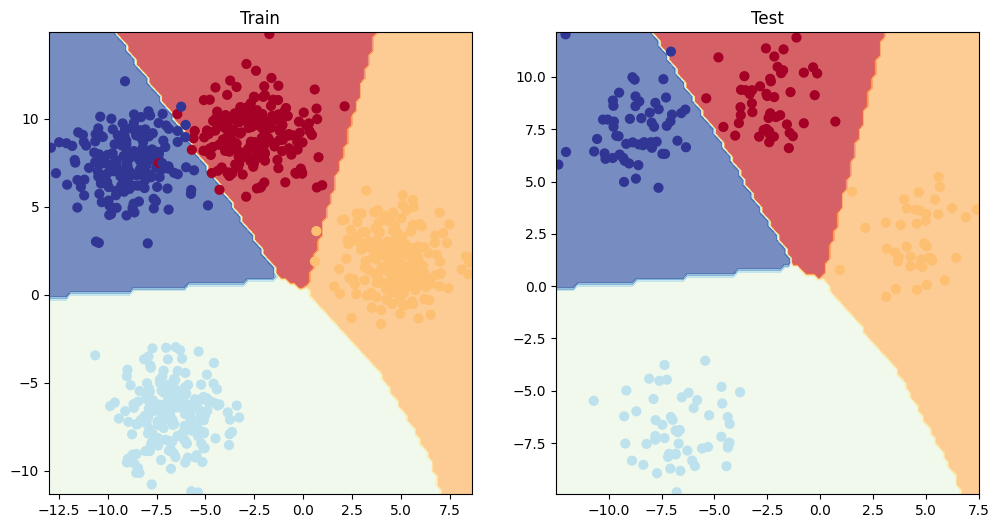

In [170]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)

### Evaluating  a model

1. Accuracy
tp+tn / total - sklearn.metrics.accuracy_score()
2. Precision - tp / tp + fp -  sklearn.metrics.precision_score()
3. Recall - tp/ tp + fn   - sklearn.metrics.recall_score()
4. F1 score = 2 * (pre * recall)/ (pre + recall)
sklearn.metrics.f1_score()
5. Confusion matrix = 

6. Classification report - 

In [171]:
!pip install torchmetrics

   ---------------------------------------- 0.0/927.3 kB ? eta -:--:--
   --------------------------------------- 927.3/927.3 kB 14.2 MB/s eta 0:00:00


In [172]:
from torchmetrics import Accuracy

torchmetric_acc = Accuracy().to(device)
torchmetric_acc(y_preds, y_test)

TypeError: Accuracy.__new__() missing 1 required positional argument: 'task'